In [1]:
%matplotlib notebook
import pandas as pd
import os
import numpy as np
import re
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt

In [2]:
coordinates = (2, 2, 2)
dimensions = (3, 3, 3)
atp = ('NH3+',)
directory = '../Datasets/TP'
step = 0.5

In [3]:
dataFile = os.listdir(directory)
dataFile

['16_PAC.gro',
 'ff3nb.itp',
 '4.top',
 '28_PAC.gro',
 '1_PAC.gro',
 'ff32nb.itp',
 '31_PAC.gro',
 '18.top',
 '15.top',
 '13.top',
 '34.top',
 'ff12nb.itp',
 '36.top',
 '6_PAC.gro',
 '19.top',
 '8_PAC.gro',
 '24.top',
 '7.top',
 '37_PAC.gro',
 '9_PAC.gro',
 '3.top',
 'ff28nb.itp',
 '6.top',
 'ff22nb.itp',
 '26_PAC.gro',
 'ff8nb.itp',
 'ff17nb.itp',
 'ff20nb.itp',
 '33.top',
 '23.top',
 '28.top',
 '13_PAC.gro',
 '14.top',
 '2.top',
 '21.top',
 '5.top',
 '30.top',
 '29.top',
 'ff13nb.itp',
 'ff14nb.itp',
 '23_PAC.gro',
 '36_PAC.gro',
 '4_PAC.gro',
 'ff27nb.itp',
 'ff30nb.itp',
 'ff11nb.itp',
 '25_PAC.gro',
 'ff2nb.itp',
 '16.top',
 '1.top',
 'ff18nb.itp',
 '14_PAC.gro',
 'ff35nb.itp',
 '20.top',
 '7_PAC.gro',
 '22.top',
 'ff6nb.itp',
 '35_PAC.gro',
 'ff23nb.itp',
 '25.top',
 '30_PAC.gro',
 '32_PAC.gro',
 'ff19nb.itp',
 '12_PAC.gro',
 '26.top',
 '18_PAC.gro',
 'ff5nb.itp',
 '5_PAC.gro',
 'ff33nb.itp',
 '22_PAC.gro',
 '27.top',
 '11.top',
 '20_PAC.gro',
 '34_PAC.gro',
 '24_PAC.gro',
 '17.t

In [4]:
n_pat = re.compile(r'(.*[0-9]+).+')

In [5]:
def sort_replace(x):
    return n_pat.search(x).group(1)

In [6]:
molecules = [x.replace('.gro', '') for x in dataFile if x.endswith('gro')]
molecules.sort(key=sort_replace)
molecules

['1_PAC',
 '10_PAC',
 '11_PAC',
 '12_PAC',
 '13_PAC',
 '14_PAC',
 '15_PAC',
 '16_PAC',
 '17_PAC',
 '18_PAC',
 '19_PAC',
 '2_PAC',
 '20_PAC',
 '21_PAC',
 '22_PAC',
 '23_PAC',
 '24_PAC',
 '25_PAC',
 '26_PAC',
 '27_PAC',
 '28_PAC',
 '29_PAC',
 '3_PAC',
 '30_PAC',
 '31_PAC',
 '32_PAC',
 '33_PAC',
 '34_PAC',
 '35_PAC',
 '36_PAC',
 '37_PAC',
 '4_PAC',
 '5_PAC',
 '6_PAC',
 '7_PAC',
 '8_PAC',
 '9_PAC']

In [7]:
dataFile = [directory + '/' + fileName for fileName in dataFile]
groFiles = [x for x in dataFile if x.endswith('gro')]
groFiles.sort(key=sort_replace)
topFiles = [x for x in dataFile if x.endswith('top')]
topFiles.sort(key=sort_replace)

In [8]:
print(groFiles)

['../Datasets/TP/1_PAC.gro', '../Datasets/TP/10_PAC.gro', '../Datasets/TP/11_PAC.gro', '../Datasets/TP/12_PAC.gro', '../Datasets/TP/13_PAC.gro', '../Datasets/TP/14_PAC.gro', '../Datasets/TP/15_PAC.gro', '../Datasets/TP/16_PAC.gro', '../Datasets/TP/17_PAC.gro', '../Datasets/TP/18_PAC.gro', '../Datasets/TP/19_PAC.gro', '../Datasets/TP/2_PAC.gro', '../Datasets/TP/20_PAC.gro', '../Datasets/TP/21_PAC.gro', '../Datasets/TP/22_PAC.gro', '../Datasets/TP/23_PAC.gro', '../Datasets/TP/24_PAC.gro', '../Datasets/TP/25_PAC.gro', '../Datasets/TP/26_PAC.gro', '../Datasets/TP/27_PAC.gro', '../Datasets/TP/28_PAC.gro', '../Datasets/TP/29_PAC.gro', '../Datasets/TP/3_PAC.gro', '../Datasets/TP/30_PAC.gro', '../Datasets/TP/31_PAC.gro', '../Datasets/TP/32_PAC.gro', '../Datasets/TP/33_PAC.gro', '../Datasets/TP/34_PAC.gro', '../Datasets/TP/35_PAC.gro', '../Datasets/TP/36_PAC.gro', '../Datasets/TP/37_PAC.gro', '../Datasets/TP/4_PAC.gro', '../Datasets/TP/5_PAC.gro', '../Datasets/TP/6_PAC.gro', '../Datasets/TP/7_P

In [9]:
print(topFiles)

['../Datasets/TP/1.top', '../Datasets/TP/10.top', '../Datasets/TP/11.top', '../Datasets/TP/12.top', '../Datasets/TP/13.top', '../Datasets/TP/14.top', '../Datasets/TP/15.top', '../Datasets/TP/16.top', '../Datasets/TP/17.top', '../Datasets/TP/18.top', '../Datasets/TP/19.top', '../Datasets/TP/2.top', '../Datasets/TP/20.top', '../Datasets/TP/21.top', '../Datasets/TP/22.top', '../Datasets/TP/23.top', '../Datasets/TP/24.top', '../Datasets/TP/25.top', '../Datasets/TP/26.top', '../Datasets/TP/27.top', '../Datasets/TP/28.top', '../Datasets/TP/29.top', '../Datasets/TP/3.top', '../Datasets/TP/30.top', '../Datasets/TP/31.top', '../Datasets/TP/32.top', '../Datasets/TP/33.top', '../Datasets/TP/34.top', '../Datasets/TP/35.top', '../Datasets/TP/36.top', '../Datasets/TP/37.top', '../Datasets/TP/4.top', '../Datasets/TP/5.top', '../Datasets/TP/6.top', '../Datasets/TP/7.top', '../Datasets/TP/8.top', '../Datasets/TP/9.top']


In [10]:
itpFiles = [x for x in dataFile if x.endswith('nb.itp')]
itpFiles.sort(key=sort_replace)
itpFiles

['../Datasets/TP/ff1nb.itp',
 '../Datasets/TP/ff10nb.itp',
 '../Datasets/TP/ff11nb.itp',
 '../Datasets/TP/ff12nb.itp',
 '../Datasets/TP/ff13nb.itp',
 '../Datasets/TP/ff14nb.itp',
 '../Datasets/TP/ff15nb.itp',
 '../Datasets/TP/ff16nb.itp',
 '../Datasets/TP/ff17nb.itp',
 '../Datasets/TP/ff18nb.itp',
 '../Datasets/TP/ff19nb.itp',
 '../Datasets/TP/ff2nb.itp',
 '../Datasets/TP/ff20nb.itp',
 '../Datasets/TP/ff21nb.itp',
 '../Datasets/TP/ff22nb.itp',
 '../Datasets/TP/ff23nb.itp',
 '../Datasets/TP/ff24nb.itp',
 '../Datasets/TP/ff25nb.itp',
 '../Datasets/TP/ff26nb.itp',
 '../Datasets/TP/ff27nb.itp',
 '../Datasets/TP/ff28nb.itp',
 '../Datasets/TP/ff29nb.itp',
 '../Datasets/TP/ff3nb.itp',
 '../Datasets/TP/ff30nb.itp',
 '../Datasets/TP/ff31nb.itp',
 '../Datasets/TP/ff32nb.itp',
 '../Datasets/TP/ff33nb.itp',
 '../Datasets/TP/ff34nb.itp',
 '../Datasets/TP/ff35nb.itp',
 '../Datasets/TP/ff36nb.itp',
 '../Datasets/TP/ff37nb.itp',
 '../Datasets/TP/ff4nb.itp',
 '../Datasets/TP/ff5nb.itp',
 '../Datasets/T

In [11]:
import math
def Distance(r1, r2):
    d = math.sqrt(math.pow(
        (r1[0] - r2[0]), 2) + math.pow((r1[1] - r2[1]), 2) + math.pow((r1[2] - r2[2]), 2))
    return d

In [12]:
class MatrixGenerate():

    def __init__(self, fileGro, fileTop, fileItp):
        self.setX(fileGro)
        self.atomsTypes(fileTop)
        self.loadConstants(fileItp)
        self.loadAP()
        self.determineConstants()

    def setX(self, fileName):
     
        self.fileNameHeader=os.path.splitext(os.path.basename(fileName))[0];
        with open(fileName) as f:
            input = f.readlines()
        currentLine = 1 #linha 1 do arquivo gro contem o numero de atomos
        line = input[currentLine]

        # coordenadas dos atomos
        x = []
        y = []
        z = []
        self.numberElements = int(input[currentLine])
        self.c6 = []
        self.c12 = []

        while True:
            for i in range(self.numberElements):
                currentToken = 3 #as coordenadas dos atomos comecam a partir da quarta coluna do arquivo
                currentLine += 1 #pula uma linha para chegar na primeira linha com coordenadas dos atomos
                line = input[currentLine]

                #tokens = re.findall(r"[\w\.']+", line)
                tokens = line.split()
                x.insert(i, tokens[currentToken])
                currentToken += 1
                y.insert(i, tokens[currentToken])
                currentToken += 1
                z.insert(i, tokens[currentToken])

            currentLine += 1
            if len(input) > currentLine + 1:
                currentLine += 1 # se nao chegou ao fim do arquivo pula uma linha a mais para ir para o proximo frame da dinamica
            else:
                break

            currentLine += 1

        self.m = len(x) # numero de linhas da matriz gerada
        # cria-se matriz com 3 linhas (uma para cada coordenada x,y e z) e as colunas como coordenadas
#         self.X = [[0 for self.X in range(3)] for self.X in range(self.m)]
        self.X = np.empty(shape=(self.m, 3))

#         self.minimos = [float(x[0]) * 10, float(y[0]) * 10, float(z[0]) * 10]
#         self.maximos = [float(x[0]) * 10, float(y[0]) * 10, float(z[0]) * 10]
        for i in range(self.m):
            self.X[i][0] = float(x[i]) * 10
            self.X[i][1] = float(y[i]) * 10
            self.X[i][2] = float(z[i]) * 10
#             self.minimos[0] = min(self.minimos[0], self.X[i][0])
#             self.minimos[1] = min(self.minimos[1], self.X[i][1])
#             self.minimos[2] = min(self.minimos[2], self.X[i][2])
#             self.maximos[0] = max(self.maximos[0], self.X[i][0])
#             self.maximos[1] = max(self.maximos[1], self.X[i][1])
#             self.maximos[2] = max(self.maximos[2], self.X[i][2])
        self.minimos = np.amin(self.X, axis=0)
        self.maximos = np.amax(self.X, axis=0)

    def atomsTypes(self, fileName):
        self.types = []
        self.cargas = []
        with open(fileName) as f:
            line = f.readline()
            while '[ atoms ]' not in line:
                line = f.readline()
                
            next(f)
            for i in range(self.numberElements):
                line = f.readline()
                atoms = line.split()
                self.types.append(atoms[1])
                self.cargas.append(float(atoms[6]))

    def loadConstants(self, fileName):
        self.typeConstants = []
        sigma = []
        epsilon = []

        with open(fileName) as f:
            line = f.readline()
            while '[ atomtypes ]' not in line:
                line = f.readline()
            next(f)
            for line in f:
                atoms = line.split()
                self.typeConstants.append(atoms[0])
                sigma.append(atoms[4])
                epsilon.append(atoms[5])

        sigma = np.array(sigma, dtype=float)
        epsilon = np.array(epsilon, dtype=float)

        self.constantc6 = (epsilon * (sigma ** 6)) * 4.
        self.constantc12 = (epsilon * (sigma ** 12)) * 4.

    def loadAP(self):
#         filename = os.path.dirname(__file__) + '/defaultsFiles/AtomProva.atp'
        filename = '../src/defaultsFiles/AtomProva.atp'
        self.ap = {}
        with open(filename, 'r') as f:
            next(f)
            next(f)
            for line in f:
                group, charge, c6, c12 = line.split()
                self.ap[group] = {'carga': float(charge), 'c6': float(c6), 'c12': float(c12)}

    def determineConstants(self):
        for c_type in self.types:
            index = self.typeConstants.index(c_type)
            self.c6.append(self.constantc6[index])
            self.c12.append(self.constantc12[index])

    def gridGenerate(self, dimX, dimY, dimZ, atp, x0, y0, z0, step):
        self.DimX = dimX
        self.DimY = dimY
        self.DimZ = dimZ
        self.natp = len(atp)

        f = 138.935485
        nframes = self.m / self.numberElements
        # self.gridCoulomb = [[[[0 for x in range(self.natp)] for x in range(self.DimZ)]
        #                    for x in range(self.DimY)] for x in range(self.DimX)]

        # self.gridLJ = [[[[0 for x in range(self.natp)] for x in range(self.DimZ)]
        #                for x in range(self.DimY)] for x in range(self.DimX)]
        self.gridCoulomb = {}
        self.gridLJ = {}

        count = 0
        # esse loop roda sobre o número de sondas escolhidas
        for h in range(self.natp):
            # elem = self.search(self.ap, atp[h])
            # elem = self.ap.index(atp[h]) # encontra-se a posicao no vetor de elementos do elemento em questao
            # carrega-se as respectivas constantes
            q1 = self.ap[atp[h]]['carga']  # self.cargasap[elem]
            c6a = self.ap[atp[h]]['c6']  # self.c6ap[elem]
            c12a = self.ap[atp[h]]['c12']  # self.c12ap[elem]
            Vlj = 0
            Vc = 0
            npontos = 0
            # r1 = []
            r1 = np.zeros(3)
            self.gridCoulomb[atp[h]] = {}
            self.gridLJ[atp[h]] = {}
            # aqui começa o loop que gera as coordenadas cartesianas
            # acho que você pode gerar os pontos com o fecho convexo e
            # substituir esses 3 loops por um loop sobre os pontos gerados
            for i in np.arange(x0, self.DimX + x0 + step, step):
                r1[0] = i + x0
                self.gridCoulomb[atp[h]][i] = {}
                self.gridLJ[atp[h]][i] = {}
                for j in np.arange(y0, self.DimY + y0 + step, step):
                    r1[1] = j + y0
                    self.gridCoulomb[atp[h]][i][j] = {}
                    self.gridLJ[atp[h]][i][j] = {}
                    for k in np.arange(z0, self.DimZ + z0 + step, step):
                        r1[2] = k + z0
                        Vlj = 0
                        Vc = 0
                        npontos += 1
                        self.gridCoulomb[atp[h]][i][j][k] = {}
                        self.gridLJ[atp[h]][i][j][k] = {}
                        count += 1
                        # geradas as coordenadas cartesianas começa o loop
                        # sobre os átomos do PAC para calcular os descriotres
                        # com base na distância entre a sonda e os átomos
                        for l in range(self.m):
                            r = Distance(r1, self.X[l]) / 10
                            rr2 = np.linalg.norm(r1 - self.X[l]) / 10
                            if rr2 != r:
                                print(rr2, r)
                            index = l % self.numberElements
                            c6ij = math.sqrt(c6a * self.c6[index])
                            c12ij = math.sqrt(c12a * self.c12[index])

                            if r != 0:
                                Vlj = Vlj + (c12ij / (math.pow(r, 12))) - \
                                    (c6ij / (math.pow(r, 6)))
                                Vc = Vc + f * float(q1) * \
                                    float(self.cargas[index]) / r
                            else:
                                Vlj = float("inf")
                                Vc = float("inf")

                        self.gridCoulomb[atp[h]][i][j][k] = Vc / nframes
                        self.gridLJ[atp[h]][i][j][k] = Vlj / math.sqrt(nframes)

    def getMatrix(self):
        textValuesCoulomb = ""
        textValuesLj = ""
        coulombMatrix = []
        ljMatrix = []
        count0 = 0
        count = 0
        for h in self.gridCoulomb:
            for i in self.gridCoulomb[h]:
                for j in self.gridCoulomb[h][i]:
                    for k in self.gridCoulomb[h][i][j]:
                        textValuesCoulomb += "%g\t" % (self.gridCoulomb[h][i][j][k])
                        textValuesLj += "%g\t" % (self.gridLJ[h][i][j][k])
                        coulombMatrix.append(self.gridCoulomb[h][i][j][k])
                        ljMatrix.append(self.gridLJ[h][i][j][k])
                        count += 1
        return textValuesCoulomb, textValuesLj, coulombMatrix, ljMatrix


In [13]:
matrices = []
minimos = np.array([999999.0, 999999.0, 999999.0])
maximos = np.array([-999999.0, -999999.0, -999999.0])
for i in range(len(groFiles)):
    matrix = MatrixGenerate(groFiles[i], topFiles[i], itpFiles[i])
    minimos = np.minimum(minimos, matrix.minimos)
    maximos = np.maximum(maximos, matrix.maximos)
    
    matrices.append(matrix)

print(minimos)
print(maximos)


[4.56 5.51 1.8 ]
[17.68 18.08 15.93]


In [14]:
x0, y0, z0 = coordinates if coordinates else (maximos.astype(int) - 5)

print(x0, y0, z0)

2 2 2


In [15]:
dim_x, dim_y, dim_z = dimensions if dimensions else ((maximos - minimos).astype(int) + 10)
print(dim_x, dim_y, dim_z)

3 3 3


In [16]:
cCoulomb = []
cLJ = []
for atp_l in atp:
    for i in np.arange(x0, dim_x + x0 + step, step):
        for j in np.arange(y0, dim_y + y0 + step, step):
            for k in np.arange(z0, dim_z + z0 + step, step):
                cCoulomb.append("%.2f_%.2f_%.2f_%s_C:" % (i, j, k, atp_l))
                cLJ.append("%.2f_%.2f_%.2f_%s_LJ:" % (i, j, k, atp_l))
output = ' \t'.join(cCoulomb + cLJ)

In [17]:
output

'2.00_2.00_2.00_NH3+_C: \t2.00_2.00_2.50_NH3+_C: \t2.00_2.00_3.00_NH3+_C: \t2.00_2.00_3.50_NH3+_C: \t2.00_2.00_4.00_NH3+_C: \t2.00_2.00_4.50_NH3+_C: \t2.00_2.00_5.00_NH3+_C: \t2.00_2.50_2.00_NH3+_C: \t2.00_2.50_2.50_NH3+_C: \t2.00_2.50_3.00_NH3+_C: \t2.00_2.50_3.50_NH3+_C: \t2.00_2.50_4.00_NH3+_C: \t2.00_2.50_4.50_NH3+_C: \t2.00_2.50_5.00_NH3+_C: \t2.00_3.00_2.00_NH3+_C: \t2.00_3.00_2.50_NH3+_C: \t2.00_3.00_3.00_NH3+_C: \t2.00_3.00_3.50_NH3+_C: \t2.00_3.00_4.00_NH3+_C: \t2.00_3.00_4.50_NH3+_C: \t2.00_3.00_5.00_NH3+_C: \t2.00_3.50_2.00_NH3+_C: \t2.00_3.50_2.50_NH3+_C: \t2.00_3.50_3.00_NH3+_C: \t2.00_3.50_3.50_NH3+_C: \t2.00_3.50_4.00_NH3+_C: \t2.00_3.50_4.50_NH3+_C: \t2.00_3.50_5.00_NH3+_C: \t2.00_4.00_2.00_NH3+_C: \t2.00_4.00_2.50_NH3+_C: \t2.00_4.00_3.00_NH3+_C: \t2.00_4.00_3.50_NH3+_C: \t2.00_4.00_4.00_NH3+_C: \t2.00_4.00_4.50_NH3+_C: \t2.00_4.00_5.00_NH3+_C: \t2.00_4.50_2.00_NH3+_C: \t2.00_4.50_2.50_NH3+_C: \t2.00_4.50_3.00_NH3+_C: \t2.00_4.50_3.50_NH3+_C: \t2.00_4.50_4.00_NH3+_C: \

In [18]:
print(atp)

('NH3+',)


In [19]:
coulombMatrix = []
ljMatrix = []
for matrix in matrices:
    matrix.gridGenerate(dim_x, dim_y, dim_z, atp, x0, y0, z0, step)
    txt_val_c, txt_val_lj, coulombRow, ljRow = matrix.getMatrix()

    print(np.array(ljRow).shape)

    output += "\n" + txt_val_c + txt_val_lj

    coulombMatrix.append(coulombRow)
    ljMatrix.append(ljRow)
    break
# print(ljMatrix)

(343,)


In [20]:
def sphe2cart(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

def cart2sphe(x, y, z):
    r = np.linalg.norm((x,y,z))
    theta = np.arccos(z / r)
    phi = np.arctan2(y, x)
    return r, theta, phi

In [21]:
sphe2cart(1, 0, 0.174533)

(0.0, 0.0, 1.0)

In [22]:
hull = ConvexHull(matrix.X)
centroid = np.mean(hull.points[hull.vertices, :], axis=0)

In [23]:
step = 10
radius = 1
base_coords = [sphe2cart(radius, 0, 0)]
# base_coords = [sphe2cart(radius, theta, phi) for theta in range(0, 180, step) for phi in range(0, 360, step)]
for theta in range(step, 180, step):
    for phi in range(0, 360, step):
        base_coords.append(sphe2cart(radius, np.radians(theta), np.radians(phi)))

base_coords = centroid - np.array(base_coords)
# base_coords
# temp_coords = [cart2sphe(*c) for c in base_coords]
# [(r,theta *180/np.pi, phi*180/np.pi) for r, theta, phi in temp_coords]
# print(base_coords[0])

In [24]:
def isect_line_plane_v3_4d(p0, p1, plane, epsilon=1e-6):
    """
    p0, p1: define the line
    p_co, p_no: define the plane:
        p_co is a point on the plane (plane coordinate).
        p_no is a normal vector defining the plane direction;
             (does not need to be normalized).

    return a Vector or None (when the intersection can't be found).
    """
    p_no = plane[:3]
    u = p1 - p0
    dot = np.dot(p_no, u)
    if dot > epsilon:
        # calculate a point on the plane
        # (divide can be omitted for unit hessian-normal form).
        p_co = p_no * (-plane[3] / np.linalg.norm(p_no))

        w = p0 - p_co
        fac = -np.dot(p_no, w) / dot
        u = u * fac
        return p0 + u
    else:
        return None

In [25]:
def find_plane_ray_intersection(hull, centroid, ray):
    dist = float('inf')
    index = 0
    intersection = []
    for i, plane in enumerate(hull.equations):
        inte = isect_line_plane_v3_4d(centroid, ray, plane)
        if inte is not None:
            new_dist = np.linalg.norm(inte - centroid)
            if new_dist < dist:
                index = i
                dist = new_dist
                intersection = inte
#     print(intersection)
    return np.array(intersection)

In [26]:
def get_coord_point_list(hull, centroid, cur_point, total_layers, initial_distance, delta_r):
    intersection = centroid - find_plane_ray_intersection(hull, centroid, cur_point)
#     print(centroid - intersection)
    r, theta, phi = cart2sphe(*intersection)
#     print(r, theta, phi)
    r += initial_distance
    all_points = []
    for layer in range(total_layers):
        all_points.append(centroid - (sphe2cart(r, theta, phi)))
        r += delta_r
    return all_points

In [116]:
step = 30
radius = 1
initial_distance = 2.5
all_points = []
total_layers = 7
delta_r = 2

# print(centroid)
cur_point = centroid - sphe2cart(radius, 0, 0)
# print(cur_point)
new_cur_point = centroid - cur_point
# print(new_cur_point)
r, theta, phi = cart2sphe(*new_cur_point)
# print(r, theta, phi)
# print()
# print(r, np.degrees(theta), np.degrees(phi))
all_points = get_coord_point_list(hull, centroid, cur_point, total_layers, initial_distance, delta_r)
# print(all_points)
# print(cur_point)
# print(base_coords[0])
# print
# # base_coords = [sphe2cart(radius, theta, phi) for theta in range(0, 180, step) for phi in range(0, 360, step)]
for theta in range(step, 180, step):
    for phi in range(0, 360, step):
        cur_point = centroid - sphe2cart(radius, np.radians(theta), np.radians(phi))
        print(cur_point)
        all_points += get_coord_point_list(hull, centroid, cur_point, total_layers, initial_distance, delta_r)
# all_points = centroid - np.array(all_points)
# print(all_points[1])
all_points = np.array(all_points)
all_points

[ 8.92189655  9.70465517 11.07845735]
[ 8.98888385  9.45465517 11.07845735]
[ 9.17189655  9.27164247 11.07845735]
[ 9.42189655  9.20465517 11.07845735]
[ 9.67189655  9.27164247 11.07845735]
[ 9.85490925  9.45465517 11.07845735]
[ 9.92189655  9.70465517 11.07845735]
[ 9.85490925  9.95465517 11.07845735]
[ 9.67189655 10.13766787 11.07845735]
[ 9.42189655 10.20465517 11.07845735]
[ 9.17189655 10.13766787 11.07845735]
[ 8.98888385  9.95465517 11.07845735]
[ 8.55587115  9.70465517 11.44448276]
[ 8.67189655  9.27164247 11.44448276]
[ 8.98888385  8.95465517 11.44448276]
[ 9.42189655  8.83862977 11.44448276]
[ 9.85490925  8.95465517 11.44448276]
[10.17189655  9.27164247 11.44448276]
[10.28792196  9.70465517 11.44448276]
[10.17189655 10.13766787 11.44448276]
[ 9.85490925 10.45465517 11.44448276]
[ 9.42189655 10.57068058 11.44448276]
[ 8.98888385 10.45465517 11.44448276]
[ 8.67189655 10.13766787 11.44448276]
[ 8.42189655  9.70465517 11.94448276]
[ 8.55587115  9.20465517 11.94448276]
[ 8.92189655

array([[ 9.42189655,  9.70465517,  5.44118789],
       [ 9.42189655,  9.70465517,  3.44118789],
       [ 9.42189655,  9.70465517,  1.44118789],
       ...,
       [ 3.25347399, 13.2659956 , 24.28132789],
       [ 2.38744858, 13.7659956 , 26.01337869],
       [ 1.52142318, 14.2659956 , 27.7454295 ]])

<IPython.core.display.Javascript object>


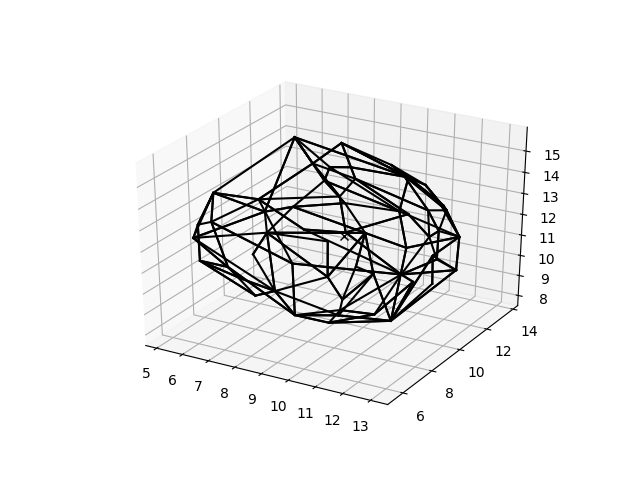

In [227]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# n = 100
plt.show()

In [84]:
matrix = matrices[0]
# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# for xs, ys, zs in matrix.X:
ax.scatter(matrix.X[:,0], matrix.X[:,1], matrix.X[:,2], c='blue', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

Text(0.0910982,0.0122048,'Z Label')

In [107]:
ax.scatter(base_coords[:,0], base_coords[:,1], base_coords[:,2], c='red', marker='^')

In [228]:
print(centroid)
plt.plot([centroid[0]],[centroid[1]],[centroid[2]], c='black', marker='x')

[ 9.42189655  9.70465517 11.94448276]


In [118]:
coords = np.array([centroid, centroid - sphe2cart(10, np.radians(0), 0)])
# print(coords)
ax.plot(coords[:,0], coords[:,1], coords[:,2])
for theta in range(step, 180, step):
    for phi in range(0, 360, step):
        coords = np.array([centroid, centroid - sphe2cart(10, np.radians(theta), np.radians(phi))])
        ax.plot(coords[:,0], coords[:,1], coords[:,2])

In [91]:
print(centroid - sphe2cart(10, np.radians(10), 0))
print(all_points[1])

[7.68541478 9.70465517 2.09640523]
[9.42189655 9.70465517 4.44118789]


In [229]:
# plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(matrix.X[simplex, 0], matrix.X[simplex, 1], matrix.X[simplex, 2], 'k-')

In [112]:
ref_point = base_coords[1]
dist = float('inf')
intersection = []
for plane in hull.equations:
    inte = isect_line_plane_v3_4d(centroid, ref_point, plane)
    if inte is not None:
        new_dist = np.linalg.norm(inte - centroid)
        if new_dist < dist:
            index = i
            dist = new_dist
            intersection = inte

# plane = hull.equations[index]
normal = plane[:3]
d = plane[3]
# create x,y
xx, yy = np.meshgrid(range(0,12), range(0,17))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
# # plot the surface
# plt3d = plt.figure().gca(projection='3d')
print(intersection)
print(cart2sphe(intersection[0], intersection[1], intersection[2]))

[8.72734653 9.70465517 8.00549384]
(15.311265171349294, 1.0206054754713747, 0.83837094090164)


In [113]:
ax.plot_surface(xx, yy, z, alpha=0.2)
plt.plot([intersection[0]],[intersection[1]],[intersection[2]], c='pink', marker='o')

In [119]:
ax.scatter(all_points[:,0], all_points[:,1], all_points[:,2], c='red', marker='^')

In [250]:
lj_file = '../src/output_LJ.csv'

df_lj = pd.read_csv(lj_file, sep=';', index_col=0, header=None)
df_lj = df_lj.transpose()
df_lj.head()

,1_PAC,10_PAC,11_PAC,12_PAC,13_PAC
1,-4.257454,-4.093660,-10.325852,-4.839733,-4.375885
2,-3.909027,-4.491747,-11.368850,-4.457390,-4.232949
3,-3.568478,-4.546623,-11.611818,-4.089028,-4.024540
4,-3.246390,-4.413369,-11.372601,-3.741805,-3.780761
5,-2.947731,-4.182487,-10.854863,-3.419147,-3.521915


In [249]:
points_file = '../src/output_Points.csv'

df_points = pd.read_csv(points_file, sep=';', index_col=0, header=None)
df_points.head()
# df_points[1][0]

df_points = df_points.applymap(lambda x: [float(e) for e in x.split(',')])
df_points = df_points.transpose()
df_points.head()

,1_PAC,10_PAC,11_PAC,12_PAC,13_PAC
1,"[9.456898834745763, 9.677370233050848, 5.46052...","[11.50063244047619, 10.863095238095237, 3.3558...","[10.721203512396695, 11.41900180785124, 4.9467...","[11.207359813084112, 11.21345648364486, 3.2525...","[9.871544471153847, 10.999774639423077, 1.7778..."
2,"[9.456898834745763, 9.677370233050848, 5.36052...","[11.50063244047619, 10.863095238095237, 3.2558...","[10.721203512396695, 11.41900180785124, 4.8467...","[11.207359813084112, 11.21345648364486, 3.1525...","[9.871544471153847, 10.999774639423077, 1.6778..."
3,"[9.456898834745763, 9.677370233050848, 5.26052...","[11.50063244047619, 10.863095238095237, 3.1558...","[10.721203512396695, 11.41900180785124, 4.7467...","[11.207359813084112, 11.21345648364486, 3.0525...","[9.871544471153847, 10.999774639423077, 1.5778..."
4,"[9.456898834745763, 9.677370233050848, 5.16052...","[11.50063244047619, 10.863095238095237, 3.0558...","[10.721203512396695, 11.41900180785124, 4.6467...","[11.207359813084112, 11.21345648364486, 2.9525...","[9.871544471153847, 10.999774639423077, 1.4778..."
5,"[9.456898834745763, 9.677370233050848, 5.06052...","[11.50063244047619, 10.863095238095237, 2.9558...","[10.721203512396695, 11.41900180785124, 4.5467...","[11.207359813084112, 11.21345648364486, 2.8525...","[9.871544471153847, 10.999774639423077, 1.3778..."


In [251]:
df_lj[df_lj > 0]

,1_PAC,10_PAC,11_PAC,12_PAC,13_PAC
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN


In [236]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_lj['8_PAC'].plot()
plt.show()

<IPython.core.display.Javascript object>

KeyError: '8_PAC'

In [237]:
df_lj[df_lj > 0.].count()

0
1_PAC     427
10_PAC    427
11_PAC    427
12_PAC    427
13_PAC    427
14_PAC    427
15_PAC    427
16_PAC    426
17_PAC    427
18_PAC    427
dtype: int64

In [188]:
pp = np.array(df_points['1_PAC'].tolist())

In [226]:
ax.scatter(pp[:,0], pp[:,1], pp[:,2], c='red', marker='^')

/home/disk2/speed/bernardoabreu/LQTAgridPy/myenv/lib/python3.4/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [210]:
aa = np.array([1,4,8])
aa

array([1, 4, 8])

In [221]:
with np.errstate(divide='ignore'):
    a = aa / np.array([1,0,2])
a[1] + 2

inf

In [248]:
xx = np.array([1,2,3,4,5,6])
yy = np.array([1,2,3])
(xx.reshape(2,3) + yy).ravel()

aa = np.array([[1,1,1],[2,2,2],[4,4,4]])
bb = np.array([[1,1,1],[3,3,3],[6,6,6]])
np.linalg.norm(aa-bb, axis=1)
# np.linalg.norm()
a = 28.87414443019312
b= 28.874144430193127
abs(a - b) <= max(1e-9 * max(abs(a), abs(b)), 0)

True